In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy
scipy.stats.mode

<function scipy.stats.stats.mode(a, axis=0, nan_policy='propagate')>

In [163]:
train = pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/Logistic Regression/titanic/train.csv")
test = pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/Logistic Regression/titanic/test.csv")
sample = pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/Logistic Regression/titanic/gender_submission.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
train.shape,test.shape

((891, 12), (418, 11))

In [14]:
train.Survived.isna().sum()

0

In [16]:
data=pd.concat([train,test])

In [17]:
data.shape

(1309, 12)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


<AxesSubplot:ylabel='Frequency'>

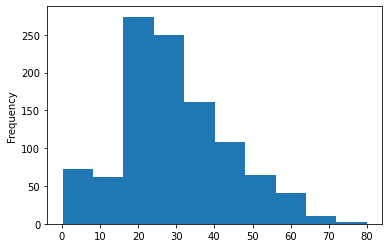

In [20]:
data["Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

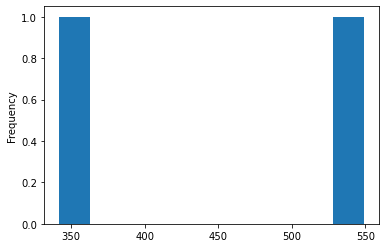

In [21]:
data["Survived"].value_counts().plot(kind='hist')

In [22]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass'>

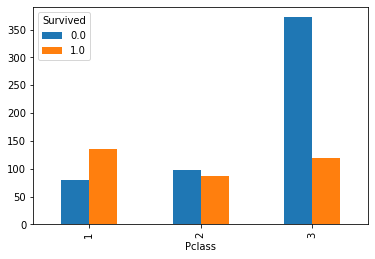

In [24]:
pd.crosstab(data["Pclass"],data["Survived"]).plot(kind="bar")

In [35]:
gender=pd.crosstab(data["Sex"],data["Survived"])

In [36]:
gender

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


In [37]:
gender.sum(1)

Sex
female    314
male      577
dtype: int64

In [39]:
gender.div(gender.sum(1),axis = 0)

Survived,0.0,1.0
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<AxesSubplot:xlabel='Sex'>

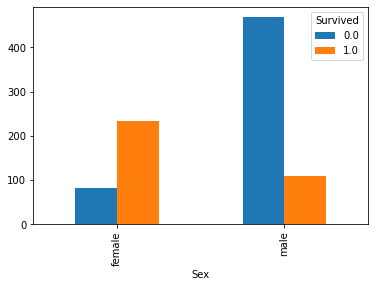

In [29]:
pd.crosstab(data["Sex"],data["Survived"]).plot(kind="bar")

<AxesSubplot:xlabel='Sex'>

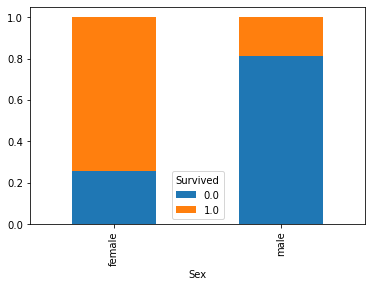

In [40]:
gender.div(gender.sum(1),axis = 0).plot(kind = "bar", stacked = "True")

In [41]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

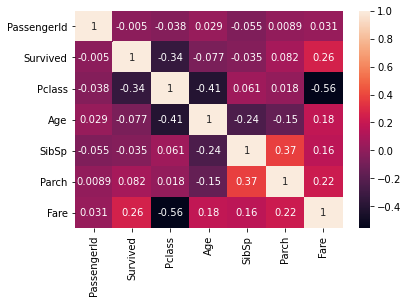

In [42]:
sbn.heatmap(data.corr(),annot=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [139]:
data["SibSp_log"] = np.log1p(data["SibSp"])
data["Parch_log"] = np.log1p(data["Parch"])
data["Fare_log"] = np.log1p(data["Fare"])

In [45]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SibSp_log,Parch_log,Fare_log
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.048254,-0.002656,0.019718
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.029430,0.114999,0.329862
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.004561,-0.007091,-0.685974
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.198939,-0.205905,0.194624
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.933902,0.439345,0.311611
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.387501,0.952652,0.323512
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.196347,0.247324,0.805469
SibSp_log,-0.048254,0.029430,-0.004561,-0.198939,0.933902,0.387501,0.196347,1.000000,0.452133,0.373084
Parch_log,-0.002656,0.114999,-0.007091,-0.205905,0.439345,0.952652,0.247324,0.452133,1.000000,0.359728
Fare_log,0.019718,0.329862,-0.685974,0.194624,0.311611,0.323512,0.805469,0.373084,0.359728,1.000000


<AxesSubplot:>

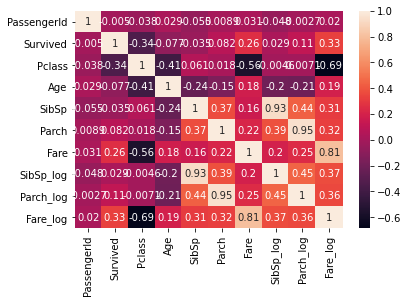

In [46]:
sbn.heatmap(data.corr(),annot=True)

In [47]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
SibSp_log         0
Parch_log         0
Fare_log          1
dtype: int64

In [54]:
data["Cabin"].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C78                4
                  ..
D22                1
C128               1
B94                1
A32                1
D34                1
Name: Cabin, Length: 186, dtype: int64

In [55]:
data[data["Sex"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log


In [56]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.000000,0.000000,2.202765


In [164]:
data.reset_index().drop(columns="index")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,C23,S,0.000000,0.000000,2.202765
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,0.000000,0.000000,4.699571
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,C23,S,0.000000,0.000000,2.110213
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,C23,S,0.000000,0.000000,2.202765


In [58]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.000000,0.000000,2.246893
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0.000000,0.000000,2.639057
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0.000000,0.000000,2.107178
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0.000000,0.000000,2.107178
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0.000000,0.000000,2.183711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,0.000000,0.000000,2.165711
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,0.000000,0.000000,2.169054
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.000000,0.000000,2.202765
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.000000,0.000000,2.202765


In [59]:
data[data["Age"].isna()].Survived.value_counts()

0.0    125
1.0     52
Name: Survived, dtype: int64

In [60]:
data["Age"].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

In [64]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.000000,0.000000,2.202765


In [71]:
data[data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0.0,0.0,4.394449
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0.0,0.0,4.394449


In [75]:
data.loc[data.Cabin == "B28", "Embarked"] = "B"

In [165]:
data["Fare"] = data.groupby("Embarked").Fare.transform(lambda x: x.fillna(x.median()))

In [166]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log


In [167]:
data["Age"] = data.groupby("Sex").Age.transform(lambda x: x.fillna(x.median()))

In [168]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S,0.693147,0.0,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0.693147,0.0,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23,S,0.000000,0.0,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.693147,0.0,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23,S,0.000000,0.0,2.202765
5,6,0.0,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,C23,Q,0.000000,0.0,2.246893


In [169]:
data[data["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log


In [170]:
data[data["Cabin"].isna()].Embarked.value_counts()

Series([], Name: Embarked, dtype: int64)

In [171]:
data["Cabin"].mode()

0    C23
dtype: object

In [172]:
#data_preprocessed = data.drop(columns=["SibSp","Parch","Fare"])
data["Cabin"] = data.groupby("Embarked").Cabin.transform(lambda x: x.fillna(x.mode()))


In [130]:
data[data["Cabin"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.693147,0.000000,4.280593
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.693147,0.000000,3.990834
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.000000,0.000000,3.967694
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.693147,0.693147,2.873565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,0.693147,0.000000,3.357622
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0.000000,0.000000,2.698841
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0.693147,0.693147,5.358942
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0.693147,0.000000,4.510860


In [173]:
data["Cabin"].fillna("C23",inplace=True)

In [174]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
SibSp_log        0
Parch_log        0
Fare_log         0
dtype: int64

In [175]:
data_preprocessed = data.drop(columns=["SibSp","Parch","Fare"])

In [176]:
data_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [177]:
data_preprocessed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Cabin', 'Embarked', 'SibSp_log', 'Parch_log', 'Fare_log'],
      dtype='object')

In [178]:
data_preprocessed.shape

(1309, 12)

In [179]:
data_preprocessed.drop(['PassengerId'], axis = 1)

,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [180]:
data_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [181]:
data_new=data_preprocessed.drop(['PassengerId'], axis = 1)

In [188]:
data_new

,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [189]:
data_new.reset_index().drop(columns="index")

,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
1307,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [192]:
data_new

,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [193]:
cat_col = data_new.select_dtypes(exclude=np.number).columns

In [194]:
cat_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [199]:
cat_col_tranform = pd.get_dummies(data_preprocessed[cat_col])

In [200]:
cat_col_tranform

,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_B,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [201]:
num_col = data_preprocessed.select_dtypes(include=np.number).columns

In [202]:
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp_log', 'Parch_log',
       'Fare_log'],
      dtype='object')

In [203]:
data_preprocessed_cat_num = pd.concat([data_preprocessed['PassengerId'],cat_col_tranform, data_preprocessed[num_col]], axis = 1)

In [204]:
data_preprocessed_cat_num 

,PassengerId,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes",...,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0.0,3,22.000000,0.693147,0.000000,2.110213
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,2,1.0,1,38.000000,0.693147,0.000000,4.280593
2,3,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1.0,3,26.000000,0.000000,0.000000,2.188856
3,4,0,0,0,0,0,0,0,0,0,...,0,0,1,4,1.0,1,35.000000,0.693147,0.000000,3.990834
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,5,0.0,3,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0,0,0,...,0,0,1,1305,NaN,3,30.585228,0.000000,0.000000,2.202765
414,1306,0,0,0,0,0,0,0,0,0,...,1,0,0,1306,NaN,1,39.000000,0.000000,0.000000,4.699571
415,1307,0,0,0,0,0,0,0,0,0,...,0,0,1,1307,NaN,3,38.500000,0.000000,0.000000,2.110213
416,1308,0,0,0,0,0,0,0,0,0,...,0,0,1,1308,NaN,3,30.585228,0.000000,0.000000,2.202765


In [205]:
data_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,SibSp_log,Parch_log,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,C23 C25 C27,S,0.693147,0.000000,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,C85,C,0.693147,0.000000,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,C23,S,0.000000,0.000000,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,C123,S,0.693147,0.000000,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,373450,C23,S,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,A.5. 3236,C23,S,0.000000,0.000000,2.202765
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,PC 17758,C105,C,0.000000,0.000000,4.699571
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,SOTON/O.Q. 3101262,C23,S,0.000000,0.000000,2.110213
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,359309,C23,S,0.000000,0.000000,2.202765


In [206]:
train_preprocessd = data_preprocessed_cat_num.dropna(subset=["Survived"])

In [207]:
train_preprocessd

,PassengerId,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes",...,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0.0,3,22.000000,0.693147,0.000000,2.110213
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,2,1.0,1,38.000000,0.693147,0.000000,4.280593
2,3,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1.0,3,26.000000,0.000000,0.000000,2.188856
3,4,0,0,0,0,0,0,0,0,0,...,0,0,1,4,1.0,1,35.000000,0.693147,0.000000,3.990834
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,5,0.0,3,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,0,0,0,0,0,0,...,0,0,1,887,0.0,2,27.000000,0.000000,0.000000,2.639057
887,888,0,0,0,0,0,0,0,0,0,...,0,0,1,888,1.0,1,19.000000,0.000000,0.000000,3.433987
888,889,0,0,0,0,0,0,0,0,0,...,0,0,1,889,0.0,3,28.687088,0.693147,1.098612,3.196630
889,890,0,0,0,0,0,0,0,0,0,...,1,0,0,890,1.0,1,26.000000,0.000000,0.000000,3.433987


In [208]:
test_preprocessd = data_preprocessed_cat_num[data_preprocessed_cat_num["Survived"].isna()]

In [209]:
test_preprocessd

,PassengerId,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes",...,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,892,0,0,0,0,0,0,0,0,0,...,0,1,0,892,NaN,3,34.500000,0.000000,0.000000,2.178064
1,893,0,0,0,0,0,0,0,0,0,...,0,0,1,893,NaN,3,47.000000,0.693147,0.000000,2.079442
2,894,0,0,0,0,0,0,0,0,0,...,0,1,0,894,NaN,2,62.000000,0.000000,0.000000,2.369075
3,895,0,0,0,0,0,0,0,0,0,...,0,0,1,895,NaN,3,27.000000,0.000000,0.000000,2.268252
4,896,0,0,0,0,0,0,0,0,0,...,0,0,1,896,NaN,3,22.000000,0.693147,0.693147,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0,0,0,...,0,0,1,1305,NaN,3,30.585228,0.000000,0.000000,2.202765
414,1306,0,0,0,0,0,0,0,0,0,...,1,0,0,1306,NaN,1,39.000000,0.000000,0.000000,4.699571
415,1307,0,0,0,0,0,0,0,0,0,...,0,0,1,1307,NaN,3,38.500000,0.000000,0.000000,2.110213
416,1308,0,0,0,0,0,0,0,0,0,...,0,0,1,1308,NaN,3,30.585228,0.000000,0.000000,2.202765


In [210]:
test_preprocessd = test_preprocessd.drop(columns="Survived")

In [211]:
test_preprocessd

,PassengerId,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes",...,Embarked_B,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,892,0,0,0,0,0,0,0,0,0,...,0,0,1,0,892,3,34.500000,0.000000,0.000000,2.178064
1,893,0,0,0,0,0,0,0,0,0,...,0,0,0,1,893,3,47.000000,0.693147,0.000000,2.079442
2,894,0,0,0,0,0,0,0,0,0,...,0,0,1,0,894,2,62.000000,0.000000,0.000000,2.369075
3,895,0,0,0,0,0,0,0,0,0,...,0,0,0,1,895,3,27.000000,0.000000,0.000000,2.268252
4,896,0,0,0,0,0,0,0,0,0,...,0,0,0,1,896,3,22.000000,0.693147,0.693147,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1305,3,30.585228,0.000000,0.000000,2.202765
414,1306,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1306,1,39.000000,0.000000,0.000000,4.699571
415,1307,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1307,3,38.500000,0.000000,0.000000,2.110213
416,1308,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1308,3,30.585228,0.000000,0.000000,2.202765


In [212]:
train_preprocessd.to_csv("train_preprocessed.csv", index = False)

In [213]:
test_preprocessd.to_csv("test_preprocessd.csv", index = False)

In [214]:
test_preprocessd.shape

(418, 2436)

In [215]:
train_preprocessd.shape

(891, 2437)

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [220]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessd.csv")

In [221]:
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [222]:
train.columns

Index(['PassengerId', 'Name_Abbing, Mr. Anthony',
       'Name_Abbott, Master. Eugene Joseph',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       'Name_Abelseth, Miss. Karen Marie',
       'Name_Abelseth, Mr. Olaus Jorgensen', 'Name_Abelson, Mr. Samuel',
       'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Name_Abrahamsson, Mr. Abraham August Johannes',
       ...
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'PassengerId.1', 'Survived',
       'Pclass', 'Age', 'SibSp_log', 'Parch_log', 'Fare_log'],
      dtype='object', length=2437)

In [223]:
X = train.drop(columns=["PassengerId","Survived"])

In [225]:
X

,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Embarked_B,Embarked_C,Embarked_Q,Embarked_S,PassengerId.1,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,3,22.000000,0.693147,0.000000,2.110213
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,38.000000,0.693147,0.000000,4.280593
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,3,26.000000,0.000000,0.000000,2.188856
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4,1,35.000000,0.693147,0.000000,3.990834
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,5,3,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,887,2,27.000000,0.000000,0.000000,2.639057
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,888,1,19.000000,0.000000,0.000000,3.433987
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,889,3,28.687088,0.693147,1.098612,3.196630
889,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,890,1,26.000000,0.000000,0.000000,3.433987


In [226]:
y = train["Survived"]

In [227]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [228]:
logistic_model = LogisticRegression()

In [229]:
logistic_model.fit(X,y)

/Users/girishelangovan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
logistic_model.coef_

array([[-0.04058262,  0.        , -0.07030796, ..., -0.53552184,
        -0.24648199,  0.18552425]])

<AxesSubplot:>

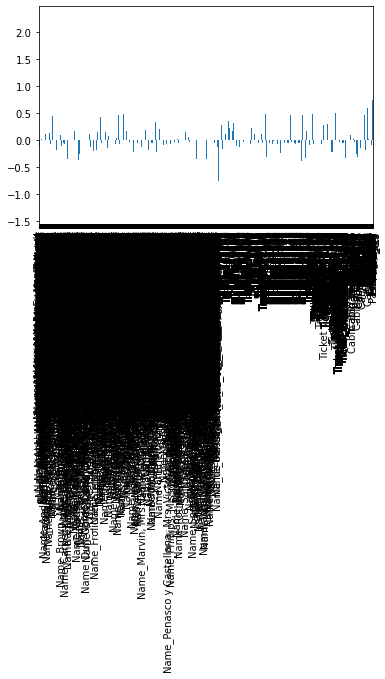

In [231]:
pd.Series(data = logistic_model.coef_[0],index=X.columns).plot(kind = "bar")

In [232]:
accuracy_score(y, logistic_model.predict(X))

0.8956228956228957

In [233]:
confusion_matrix(y, logistic_model.predict(X))

array([[517,  32],
       [ 61, 281]])

In [234]:
test_X = test.drop(columns="PassengerId")

In [235]:
test_X

,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Embarked_B,Embarked_C,Embarked_Q,Embarked_S,PassengerId.1,Pclass,Age,SibSp_log,Parch_log,Fare_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,892,3,34.500000,0.000000,0.000000,2.178064
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,893,3,47.000000,0.693147,0.000000,2.079442
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,894,2,62.000000,0.000000,0.000000,2.369075
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,895,3,27.000000,0.000000,0.000000,2.268252
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,896,3,22.000000,0.693147,0.693147,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1305,3,30.585228,0.000000,0.000000,2.202765
414,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1306,1,39.000000,0.000000,0.000000,4.699571
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1307,3,38.500000,0.000000,0.000000,2.110213
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1308,3,30.585228,0.000000,0.000000,2.202765


In [236]:
test_pred=logistic_model.predict(test_X)

In [237]:
test_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [238]:
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [239]:
sample["Survived"]= test_pred

In [240]:
sample

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [241]:
sample.to_csv("Titanic_survival.csv",index = False)